#Laporan Studi Kasus: Prediksi Kebangkrutan Bank

# 1. Pendahuluan
Bank Sentral Taiwan bertugas menjaga stabilitas industri perbankan. Salah satu tantangan adalah mendeteksi bank yang berisiko bangkrut. Dengan machine learning, kita bisa membangun model prediktif untuk mengidentifikasi bank yang berpotensi bangkrut berdasarkan data historis.

#2. Import Library

In [1]:
# Import library utama
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Untuk model machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE  # jika data tidak seimbang

In [4]:
# Tampilkan pengaturan visualisasi
plt.style.use('seaborn-v0_8')


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
df = pd.read_csv("/content/drive/MyDrive/data-bank.csv")

In [12]:

df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [14]:
# Cek nilai kosong
df.isnull().sum()

,0
Bankrupt?,0
ROA(C) before interest and depreciation before interest,0
ROA(A) before interest and % after tax,0
ROA(B) before interest and depreciation after tax,0
Operating Gross Margin,0
...,...
Liability to Equity,0
Degree of Financial Leverage (DFL),0
Interest Coverage Ratio (Interest expense to EBIT),0
Net Income Flag,0


In [16]:
# Statistik dasar
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


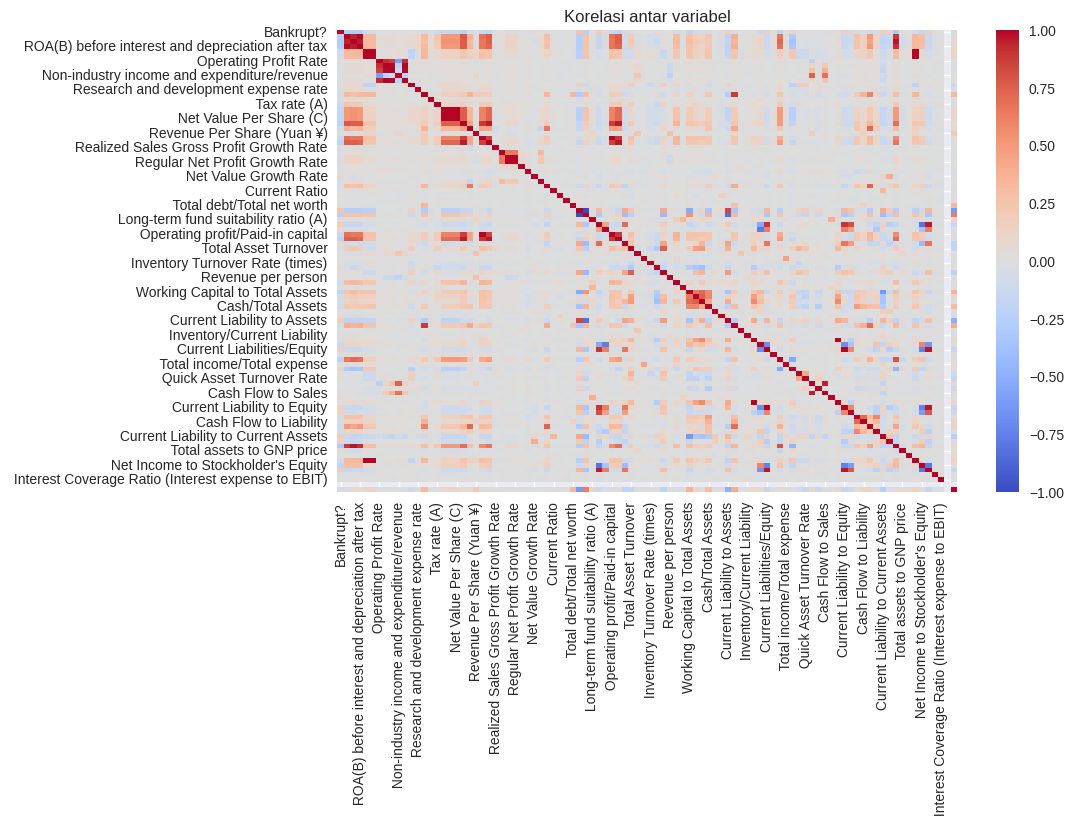

In [17]:
# Visualisasi korelasi antar variabel
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Korelasi antar variabel')
plt.show()

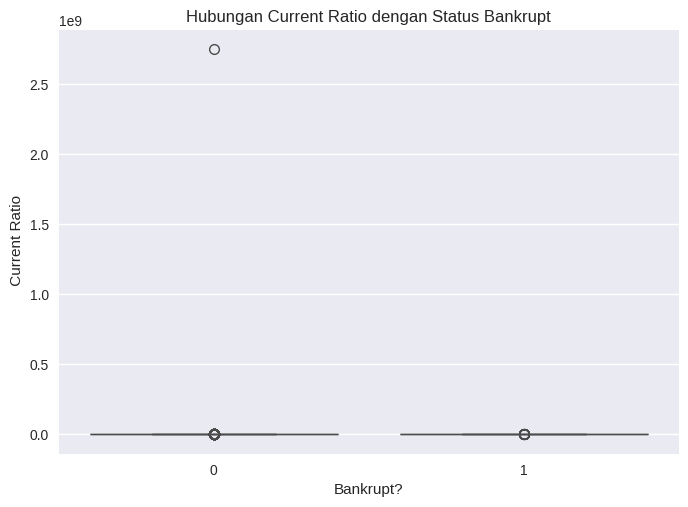

In [18]:
# Contoh hubungan variabel dengan target
sns.boxplot(x='Bankrupt?', y=' Current Ratio', data=df)
plt.title('Hubungan Current Ratio dengan Status Bankrupt')
plt.show()

# 3. Data Preparation

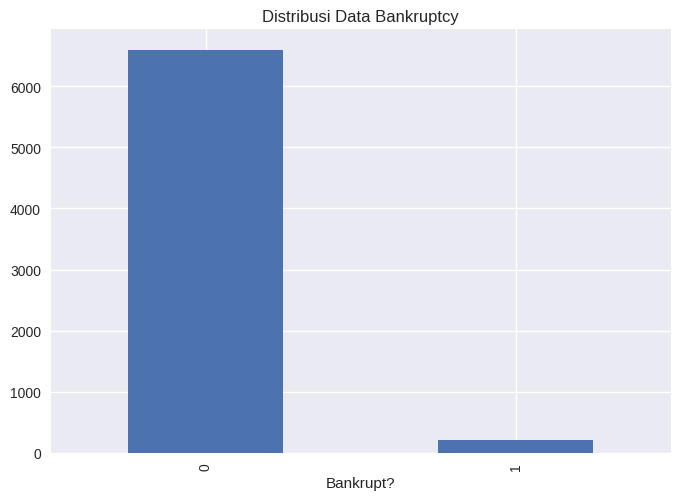

In [20]:
df['Bankrupt?'].value_counts().plot(kind='bar')
plt.title('Distribusi Data Bankruptcy')
plt.show()

In [23]:
# Pisahkan fitur dan target
X = df.drop('Bankrupt?', axis=1)
y = df['Bankrupt?']

In [22]:
# Oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)
print('Setelah SMOTE:', y_res.value_counts())

Setelah SMOTE: Bankrupt?
1    6599
0    6599
Name: count, dtype: int64


In [24]:
#Normalisasi Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_res)

# 4. Modelling

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_res, test_size=0.2, random_state=42)

In [26]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# 5. Evaluasi


=== Evaluasi Model: Random Forest ===
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1334
           1       0.96      0.99      0.98      1306

    accuracy                           0.98      2640
   macro avg       0.98      0.98      0.98      2640
weighted avg       0.98      0.98      0.98      2640



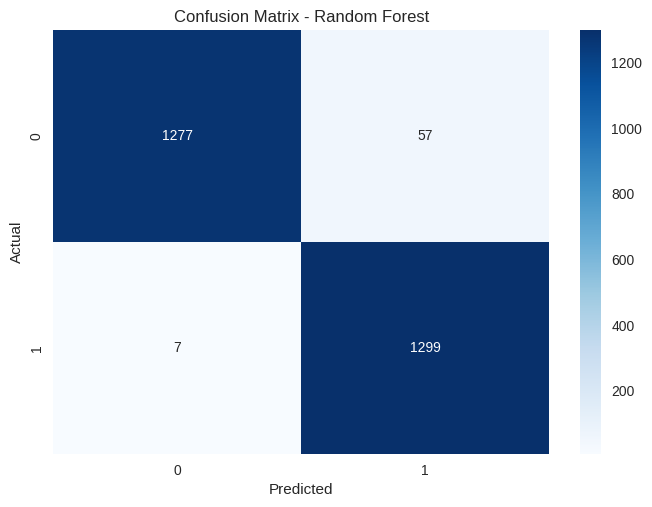

In [27]:
# Fungsi evaluasi
def evaluasi_model(y_true, y_pred, nama_model):
    print(f"\n=== Evaluasi Model: {nama_model} ===")
    print(classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {nama_model}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

evaluasi_model(y_test, y_pred_rf, "Random Forest")

# 6. Feature Importance

In [28]:
importances = rf.feature_importances_
feature_names = df.drop('Bankrupt?', axis=1).columns
feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False).head(5)
feat_imp

,Feature,Importance
85,Net Income to Total Assets,0.063860
9,Continuous interest rate (after tax),0.056331
7,After-tax net Interest Rate,0.052646
67,Retained Earnings to Total Assets,0.049941
18,Persistent EPS in the Last Four Seasons,0.042866


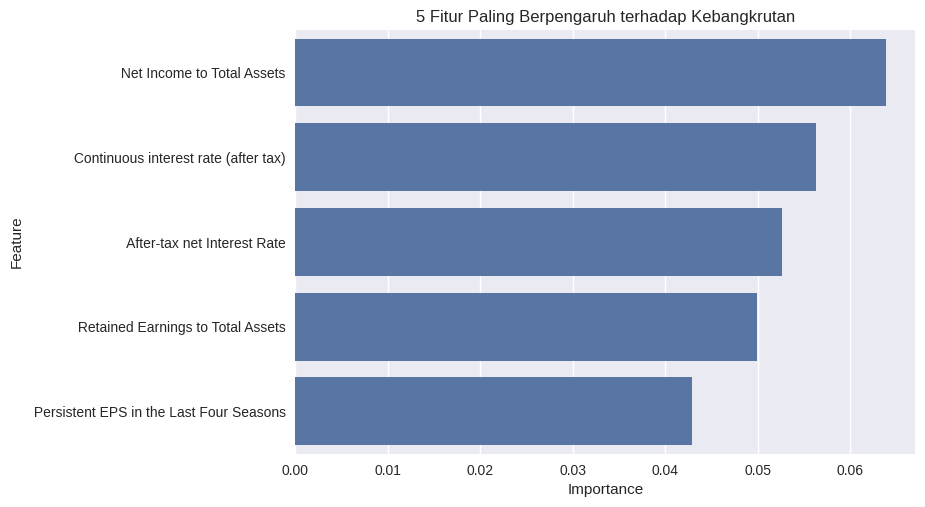

In [29]:
#Visualisasi
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title('5 Fitur Paling Berpengaruh terhadap Kebangkrutan')
plt.show()

# 7. Save

In [30]:
import joblib

In [32]:
# Simpan model ke file
joblib.dump(rf, 'model_random_forest.pkl')

print("✅ Semua model berhasil disimpan!")

✅ Semua model berhasil disimpan!


# 8. Load Model Kembali

In [33]:
# Load model dari file
model = joblib.load('model_random_forest.pkl')

In [34]:
# Coba prediksi ulang
y_pred = model.predict(X_test)
print("✅ Model berhasil dimuat dan digunakan kembali!")

✅ Model berhasil dimuat dan digunakan kembali!


In [35]:
from google.colab import files
files.download('model_random_forest.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>